In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Load the dataset
df = pd.read_csv("anime.csv")

# Check the first few rows to ensure the dataset is loaded correctly
df.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24985 non-null  int64  
 1   title             24985 non-null  object 
 2   type              24927 non-null  object 
 3   score             16050 non-null  float64
 4   scored_by         24985 non-null  int64  
 5   status            24985 non-null  object 
 6   episodes          24438 non-null  float64
 7   start_date        24110 non-null  object 
 8   end_date          22215 non-null  object 
 9   source            21424 non-null  object 
 10  members           24985 non-null  int64  
 11  favorites         24985 non-null  int64  
 12  episode_duration  24387 non-null  object 
 13  total_duration    24162 non-null  object 
 14  rating            24405 non-null  object 
 15  sfw               24985 non-null  bool   
 16  approved          24985 non-null  bool  

In [4]:
df.isnull().sum()

anime_id                0
title                   0
type                   58
score                8935
scored_by               0
status                  0
episodes              547
start_date            875
end_date             2770
source               3561
members                 0
favorites               0
episode_duration      598
total_duration        823
rating                580
sfw                     0
approved                0
created_at              0
updated_at              0
start_year           4684
start_season         4684
real_start_date       875
real_end_date        2770
broadcast_day       21535
broadcast_time      21672
genres                  0
themes                  0
demographics            0
studios                 0
producers               0
licensors               0
synopsis             4493
background          22535
main_picture          154
url                     0
trailer_url         20261
title_english       14583
title_japanese         90
title_synony

In [5]:
df.shape

(24985, 39)

In [6]:
# Filter the dataset for anime with 'comedy' in their genres
comedy_anime = df[df['genres'].str.contains('comedy', case=False, na=False)]

# Display the filtered list with title and score
comedy_anime[['title', 'score']]

,title,score
15,Mob Psycho 100 II,8.80
20,One Punch Man,8.50
31,Kaguya-sama wa Kokurasetai? Tensai-tachi no Re...,8.64
34,Spy x Family,8.60
35,Mob Psycho 100,8.49
...,...,...
24933,Oji Zou-san,NaN
24942,Qinggan Dongwuyuan,NaN
24961,Keio Yugekitai: Katsugeki-hen,NaN
24963,Meitantei Pork,NaN


In [12]:
# Count genre occurrences
genre_counts = Counter()
for genre_list in df['genres'].dropna():
    genres = genre_list.replace('[', '').replace(']', '').replace("'", '').split(', ')
    genre_counts.update([genre.strip() for genre in genres if genre and genre.isalpha()])

In [13]:
# Sort and print genres
sorted_genre_counts = sorted(genre_counts.items())
for genre, count in sorted_genre_counts:
    print(f"{genre}: {count}")

Action: 4744
Adventure: 3841
Comedy: 7154
Drama: 2839
Ecchi: 790
Erotica: 58
Fantasy: 5326
Gourmet: 149
Hentai: 1486
Horror: 535
Mystery: 846
Romance: 2065
Sports: 766
Supernatural: 1489
Suspense: 247


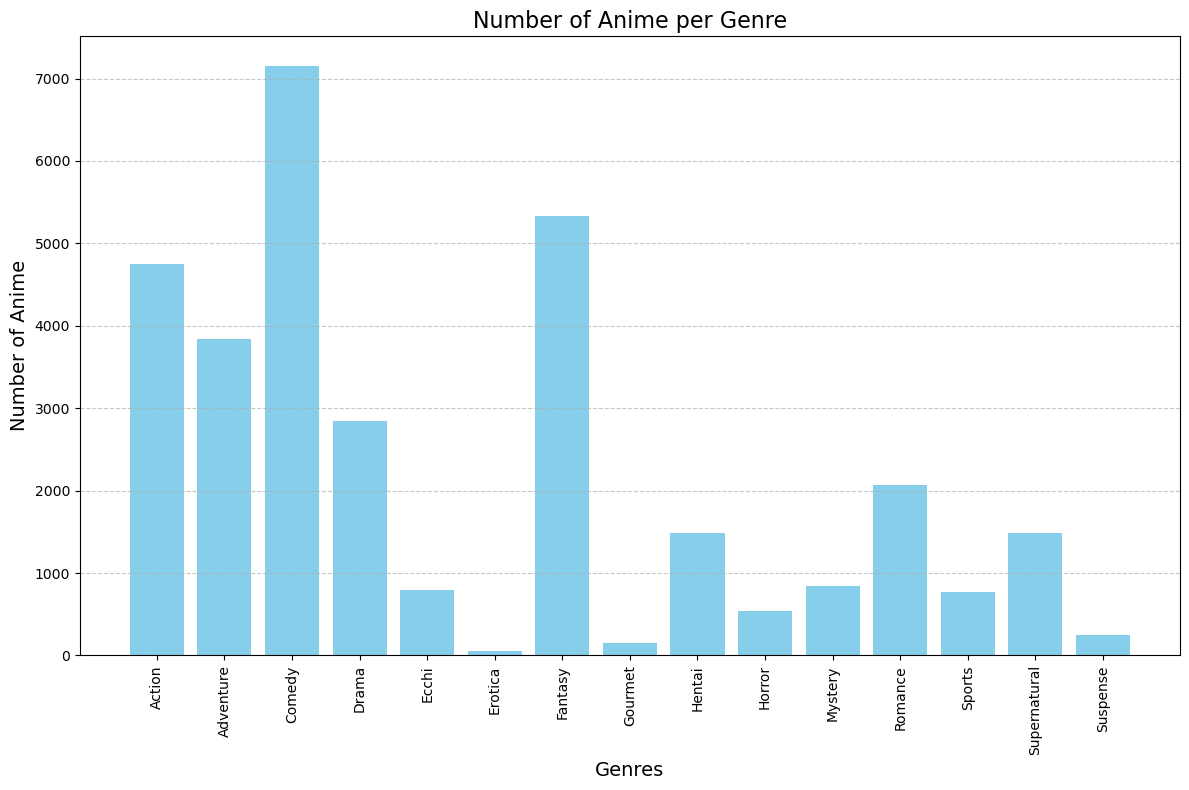

In [14]:
# Visualize genre counts
genres, counts = zip(*sorted_genre_counts)
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='skyblue')
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Anime', fontsize=14)
plt.title('Number of Anime per Genre', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Filter for anime with multiple genres
multiple_genres_anime = df[df['genres'].str.contains(',')]

# Number of such anime
num_multiple_genres = multiple_genres_anime.shape[0]

# Names of such anime
anime_titles_with_multiple_genres = multiple_genres_anime['title'].tolist()

print(f"Number of anime with multiple genres: {num_multiple_genres}")
print("Titles of anime with multiple genres:")
for title in anime_titles_with_multiple_genres:
    print(title)

Number of anime with multiple genres: 11125
Titles of anime with multiple genres:
Fullmetal Alchemist: Brotherhood
Hunter x Hunter (2011)
Shingeki no Kyojin Season 3 Part 2
Steins;Gate
Koe no Katachi
Kimi no Na wa.
Code Geass: Hangyaku no Lelouch R2
Shingeki no Kyojin: The Final Season
Sen to Chihiro no Kamikakushi
Code Geass: Hangyaku no Lelouch
Death Note
One Piece
Jujutsu Kaisen
Shingeki no Kyojin Season 3
Shigatsu wa Kimi no Uso
Mob Psycho 100 II
Shingeki no Kyojin
Cowboy Bebop
Kimetsu no Yaiba: Yuukaku-hen
Violet Evergarden
One Punch Man
Shingeki no Kyojin Season 2
Vinland Saga
Kimetsu no Yaiba
Howl no Ugoku Shiro
Kimetsu no Yaiba Movie: Mugen Ressha-hen
Clannad: After Story
Tengen Toppa Gurren Lagann
Mononoke Hime
Yakusoku no Neverland
Shingeki no Kyojin: The Final Season Part 2
Spy x Family
Mob Psycho 100
Made in Abyss
Kaguya-sama wa Kokurasetai: Ultra Romantic
Chainsaw Man
Ansatsu Kyoushitsu 2nd Season
Fate/Zero 2nd Season
JoJo no Kimyou na Bouken Part 5: Ougon no Kaze
JoJo no 